In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Plain Docker and Podman

In [ ]:
plain_path = "/content/drive/MyDrive/Research/Docker-v-Podman/Results/docker-podman"
docker_ip = "192.168.204.130"
podman_ip = "192.168.204.131"

In [ ]:
import os

#### Split seq and sim tests

In [ ]:
seq = dict()
sim = dict()

for root, dirs, files in os.walk(plain_path):
  for f in files:
    test_type = f.rpartition("_")[-1].partition(".")[0]
    test_n = f.rpartition("_")[0].rpartition("_")[-1]
    path = os.path.join(root, f)
    df = pd.read_csv(path)
    df.rename(columns={docker_ip: "docker", podman_ip: "podman"}, inplace=True)

    if test_type == "seq":
      seq[test_n] = df
    else:
      sim[test_n] = df

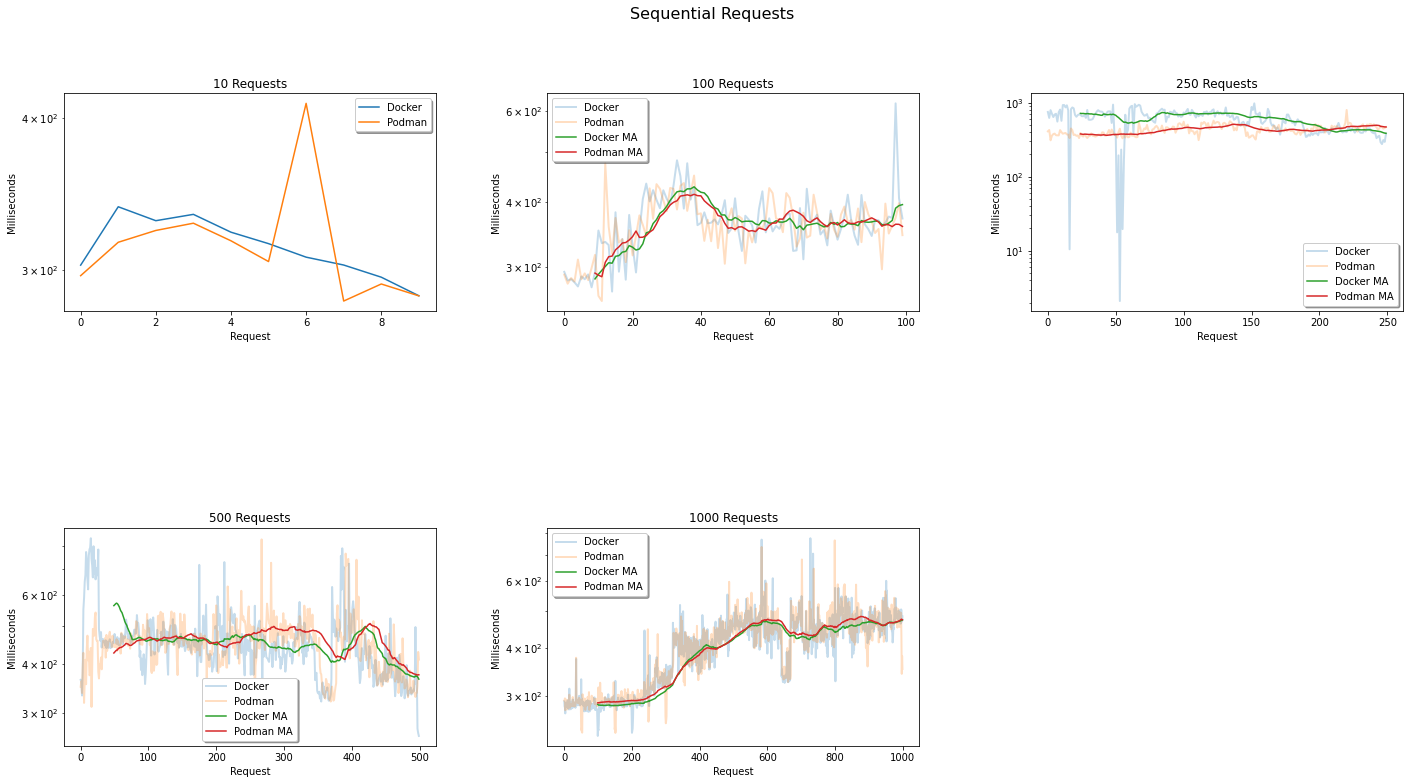

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle("Sequential Requests", fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=1)

cr = 0
cc = 0

for s in seq:
  df = seq[s]
  sample = int(s) // 10
  x = df["request"]
  yd = df["docker"]
  yp = df["podman"]
  ydma = df["docker"].rolling(sample).mean()
  ypma = df["podman"].rolling(sample).mean()

  if cr == 0 and cc == 0:
    ax[cr, cc].plot(x, ydma, label="Docker")
    ax[cr, cc].plot(x, ypma, label="Podman")
  else:
    ax[cr, cc].plot(x, yd, linewidth=2, alpha=0.25, label="Docker")
    ax[cr, cc].plot(x, yp, linewidth=2, alpha=0.25, label="Podman")
    ax[cr, cc].plot(x, ydma, label="Docker MA")
    ax[cr, cc].plot(x, ypma, label="Podman MA")
  
  ax[cr, cc].set_yscale("log")
  ax[cr, cc].title.set_text(f"{int(s)} Requests")
  ax[cr, cc].set_xlabel("Request")
  ax[cr, cc].set_ylabel("Milliseconds")
  ax[cr, cc].legend(fancybox=True, shadow=True)
  
  cc += 1

  if cc == 3:
    cr += 1
    cc = 0

ax[1, 2].remove()

plt.show()

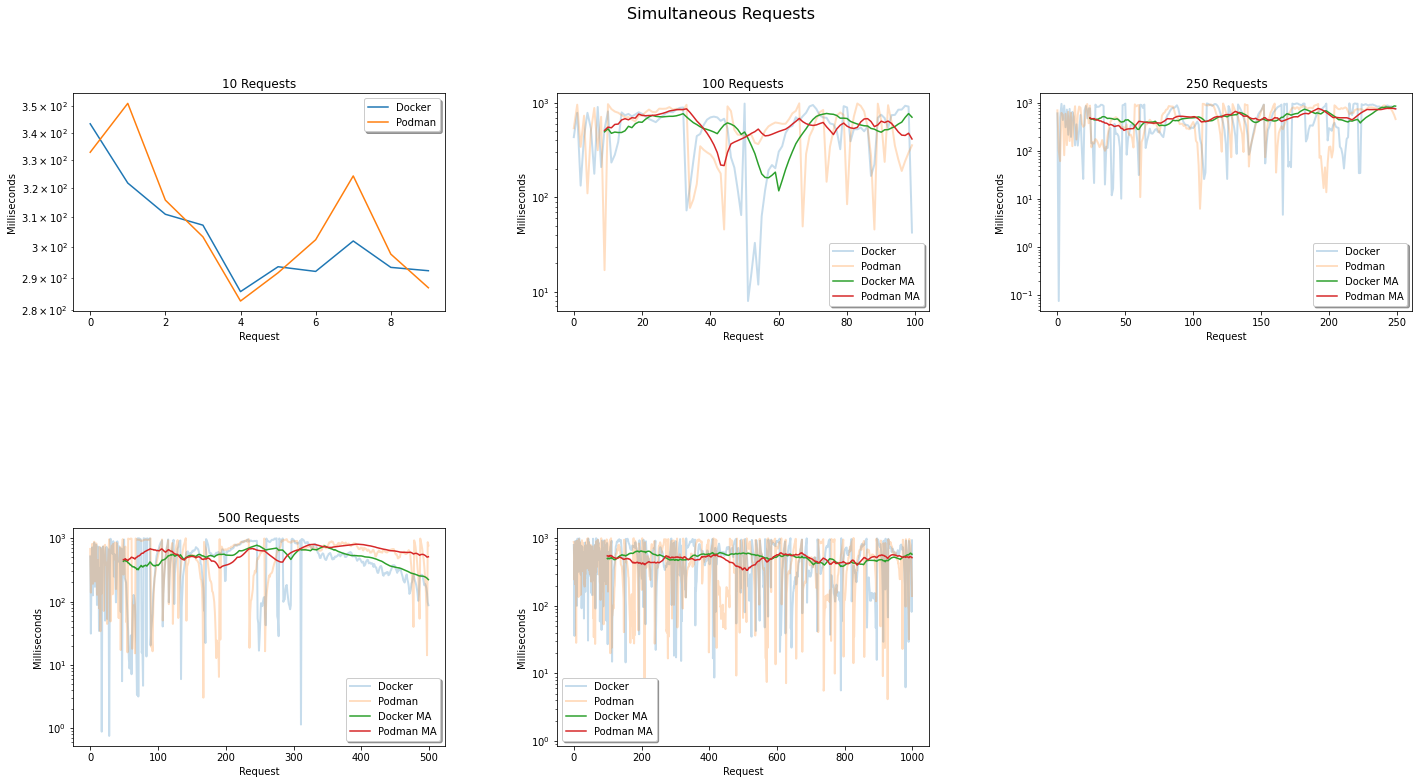

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle("Simultaneous Requests", fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=1)

cr = 0
cc = 0

for s in sim:
  df = sim[s]
  sample = int(s) // 10
  x = df["request"]
  yd = df["docker"]
  yp = df["podman"]
  ydma = df["docker"].rolling(sample).mean()
  ypma = df["podman"].rolling(sample).mean()

  if cr == 0 and cc == 0:
    ax[cr, cc].plot(x, ydma, label="Docker")
    ax[cr, cc].plot(x, ypma, label="Podman")
  else:
    ax[cr, cc].plot(x, yd, linewidth=2, alpha=0.25, label="Docker")
    ax[cr, cc].plot(x, yp, linewidth=2, alpha=0.25, label="Podman")
    ax[cr, cc].plot(x, ydma, label="Docker MA")
    ax[cr, cc].plot(x, ypma, label="Podman MA")
  
  ax[cr, cc].set_yscale("log")
  ax[cr, cc].title.set_text(f"{int(s)} Requests")
  ax[cr, cc].set_xlabel("Request")
  ax[cr, cc].set_ylabel("Milliseconds")
  ax[cr, cc].legend(fancybox=True, shadow=True)
  
  cc += 1

  if cc == 3:
    cr += 1
    cc = 0

ax[1, 2].remove()

plt.show()

## Docker and Podman in Kubernetes

In [ ]:
docker_kubernetes_path = "/content/drive/MyDrive/Research/Docker-v-Podman/Results/docker-kubernetes"
podman_kubernetes_path = "/content/drive/MyDrive/Research/Docker-v-Podman/Results/docker-podman"

In [ ]:
kube_seq = dict()
kube_sim = dict()

for root, dirs, files in os.walk(docker_kubernetes_path):
  for f in files:
    test_type = f.rpartition("_")[-1].partition(".")[0]
    test_n = f.rpartition("_")[0].rpartition("_")[-1]
    path = os.path.join(root, f)
    df = pd.read_csv(path)
    df.rename(columns={df.columns[1]: "docker"}, inplace=True)

    if test_type == "seq":
      kube_seq[test_n] = df
    else:
      kube_sim[test_n] = df

for root, dirs, files in os.walk(podman_kubernetes_path):
  for f in files:
    test_type = f.rpartition("_")[-1].partition(".")[0]
    test_n = f.rpartition("_")[0].rpartition("_")[-1]
    path = os.path.join(root, f)
    df = pd.read_csv(path)
    df.rename(columns={df.columns[1]: "podman"}, inplace=True)

    if test_type == "seq":
      df2 = kube_seq[test_n]
      df2["podman"] = df["podman"]
      kube_seq[test_n] = df2
    else:
      df2 = kube_sim[test_n]
      df2["podman"] = df["podman"]
      kube_sim[test_n] = df2

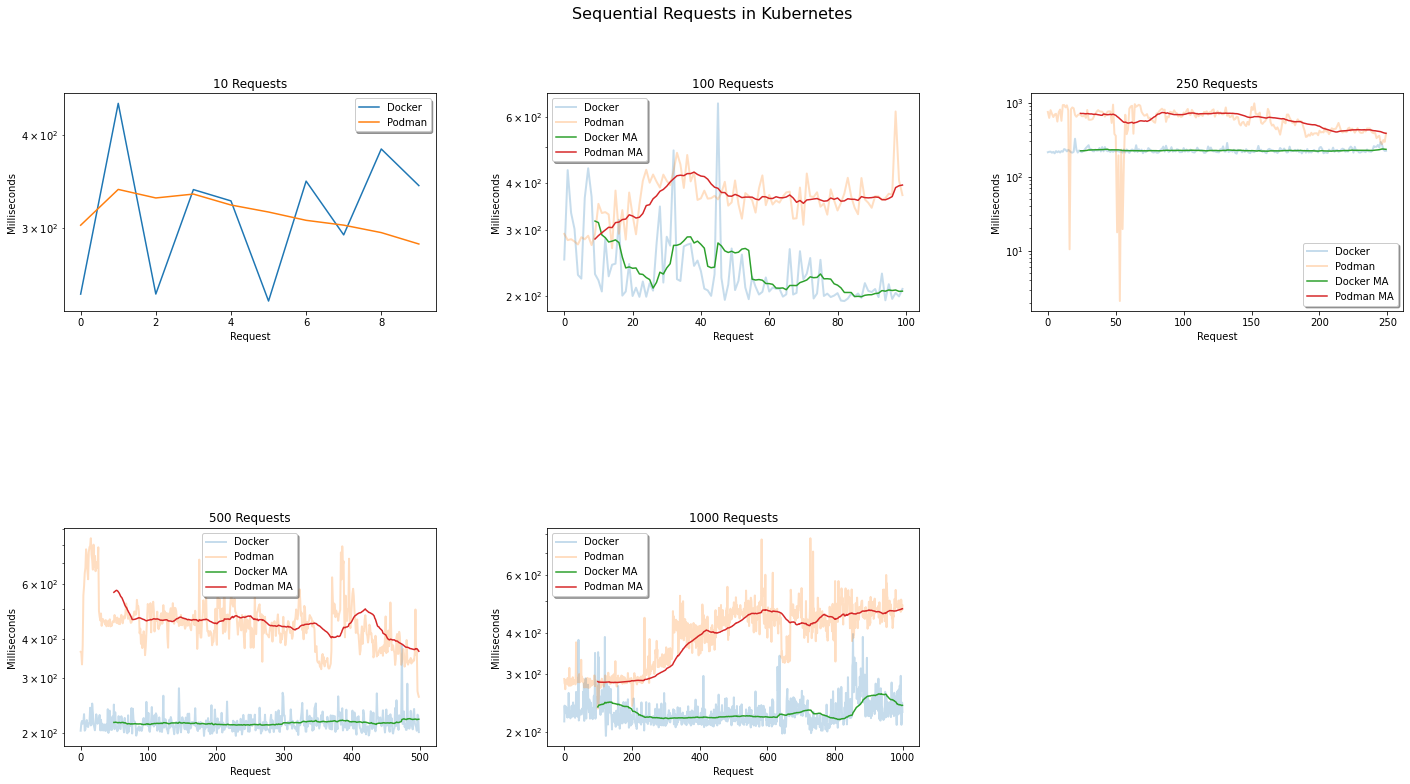

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle("Sequential Requests in Kubernetes", fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=1)

cr = 0
cc = 0

for s in kube_seq:
  df = kube_seq[s]
  sample = int(s) // 10
  x = df["request"]
  yd = df["docker"]
  yp = df["podman"]
  ydma = df["docker"].rolling(sample).mean()
  ypma = df["podman"].rolling(sample).mean()

  if cr == 0 and cc == 0:
    ax[cr, cc].plot(x, ydma, label="Docker")
    ax[cr, cc].plot(x, ypma, label="Podman")
  else:
    ax[cr, cc].plot(x, yd, linewidth=2, alpha=0.25, label="Docker")
    ax[cr, cc].plot(x, yp, linewidth=2, alpha=0.25, label="Podman")
    ax[cr, cc].plot(x, ydma, label="Docker MA")
    ax[cr, cc].plot(x, ypma, label="Podman MA")
  
  ax[cr, cc].set_yscale("log")
  ax[cr, cc].title.set_text(f"{int(s)} Requests")
  ax[cr, cc].set_xlabel("Request")
  ax[cr, cc].set_ylabel("Milliseconds")
  ax[cr, cc].legend(fancybox=True, shadow=True)
  
  cc += 1

  if cc == 3:
    cr += 1
    cc = 0

ax[1, 2].remove()

plt.show()

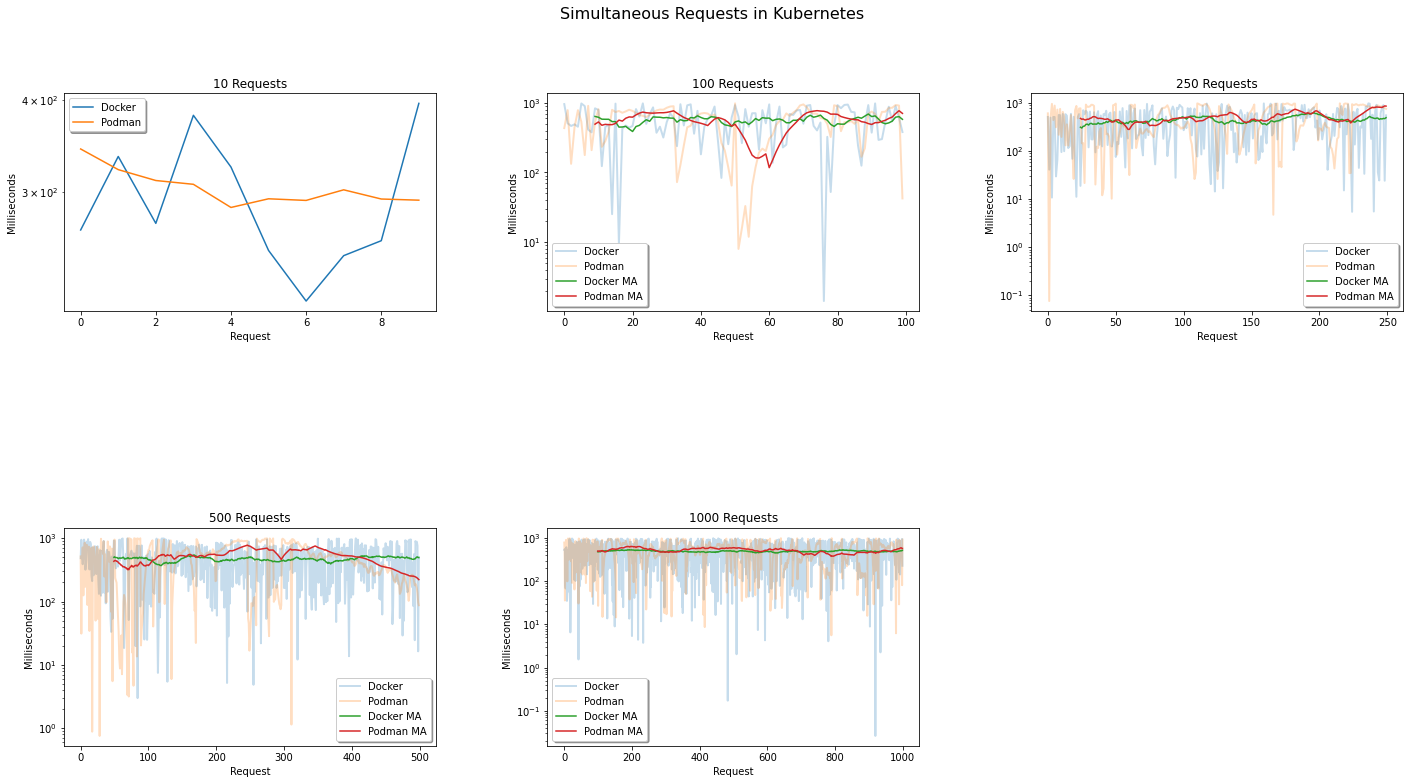

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle("Simultaneous Requests in Kubernetes", fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=1)

cr = 0
cc = 0

for s in kube_sim:
  df = kube_sim[s]
  sample = int(s) // 10
  x = df["request"]
  yd = df["docker"]
  yp = df["podman"]
  ydma = df["docker"].rolling(sample).mean()
  ypma = df["podman"].rolling(sample).mean()

  if cr == 0 and cc == 0:
    ax[cr, cc].plot(x, ydma, label="Docker")
    ax[cr, cc].plot(x, ypma, label="Podman")
  else:
    ax[cr, cc].plot(x, yd, linewidth=2, alpha=0.25, label="Docker")
    ax[cr, cc].plot(x, yp, linewidth=2, alpha=0.25, label="Podman")
    ax[cr, cc].plot(x, ydma, label="Docker MA")
    ax[cr, cc].plot(x, ypma, label="Podman MA")
  
  ax[cr, cc].set_yscale("log")
  ax[cr, cc].title.set_text(f"{int(s)} Requests")
  ax[cr, cc].set_xlabel("Request")
  ax[cr, cc].set_ylabel("Milliseconds")
  ax[cr, cc].legend(fancybox=True, shadow=True)
  
  cc += 1

  if cc == 3:
    cr += 1
    cc = 0

ax[1, 2].remove()

plt.show()

## Cost Differences

In [ ]:
docker_requests = dict()
podman_requests = dict()

for s in seq:
  docker_avg = list()
  docker_avg.append(seq[s]["docker"].mean())
  docker_avg.append(kube_seq[s]["docker"].mean())
  docker_avg.append(sim[s]["docker"].mean())
  docker_avg.append(kube_sim[s]["docker"].mean())
  docker_avg = np.array(docker_avg).mean()
  docker_requests[s] = docker_avg

  podman_avg = list()
  podman_avg.append(seq[s]["podman"].mean())
  podman_avg.append(kube_seq[s]["podman"].mean())
  podman_avg.append(sim[s]["podman"].mean())
  podman_avg.append(kube_sim[s]["podman"].mean())
  podman_avg = np.array(podman_avg).mean()
  podman_requests[s] = podman_avg

In [ ]:
docker_requests

{'10': 307.99552499999993,
 '100': 431.08650750000004,
 '250': 448.728924,
 '500': 410.141417,
 '1000': 413.18944050000005}

In [ ]:
podman_requests

{'10': 310.6207,
 '100': 461.0541225,
 '250': 518.987921,
 '500': 498.24912149999994,
 '1000': 454.99029800000005}